In [3]:
# standard Julia setup 
using Plots, LinearAlgebra, Statistics, Random, Printf

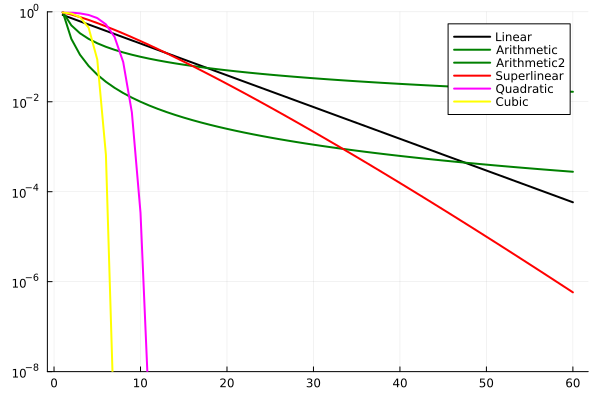

┌ Warning: Invalid negative or zero value 0.0 found at series index 17 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/nqFaB/src/utils.jl:106
┌ Warning: Invalid negative or zero value 0.0 found at series index 11 for log10 based yscale
└ @ Plots ~/.julia/packages/Plots/nqFaB/src/utils.jl:106


In [5]:
# setup plot data
k = 1:60

# Linear
seq = 0.85.^k
plot(k, seq, lab="Linear", yaxis=:log10, color="black", linewidth=2)

# Arithmetic
plot!(k, 1.0./k, lab="Arithmetic", yaxis=:log10, color="green", linewidth=2)

seq = 1.0./(k.^2)
plot!(k, seq, lab="Arithmetic2", yaxis=:log10, color="green", linewidth=2)

# Superlinear
seq = (2*k).^(-0.05*k)
plot!(k, seq, lab="Superlinear", yaxis=:log10, color="red", linewidth=2)

# Quadratic
# overflow for k = 60
t = 1:18
seq = (0.99).^(2.0.^t)
plot!(t, seq, lab="Quadratic", yaxis=(:log10, (1e-8, 1)), color="magenta", linewidth=2)

# Cubic
t = 1:12
seq = (0.99).^(3.0.^t)
plot!(t, seq, lab="Cubic", yaxis=(:log10, (1e-8, 1)), color="yellow", linewidth=2)


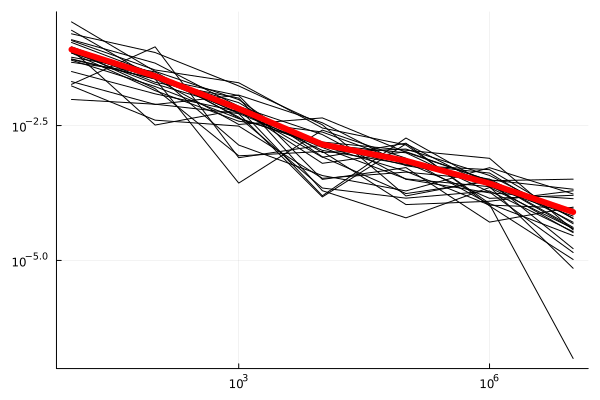

In [6]:
## Examples of convergence
# In this demo we'll see real examples of different types of convergence.

## Monte Carlo arithmetic example
# Let's integrate the function f(x) = x from 0, 1.
# This is really easy to approximate with a Monte Carlo scheme. We just
# take the average of points randomly sampled between 0 and 1.
# This method is known to converge with an arithmetic rate of 1/2.

nt = 25 # do replications to get a good expectation/average
an = zeros(7, 25)
for t = 1:nt
    for i = 1:7
        an[i, t] = mean(rand(10^i, 1)) # use 10^i points!
    end
end
err = abs.(an .- 1/2)

# Plot the convergence, the slope should be 1/2
plot(10.0.^(1:7), err, color="black",
xaxis=:log10, yaxis=:log10, legend = false)
plot!(10.0.^(1:7), mean(err, dims=2), lab="mean", color="red", linewidth=6,
    xaxis=:log10, yaxis=:log10)


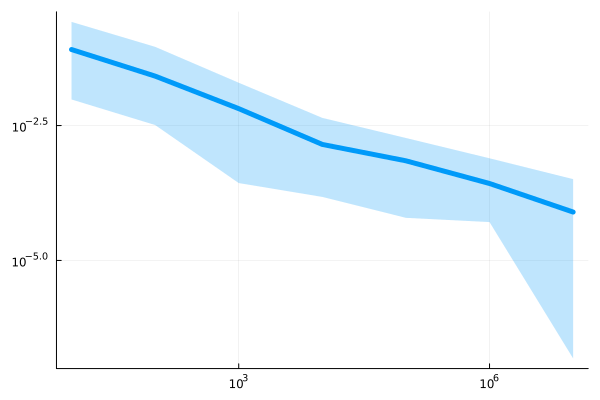

In [7]:
plot(10.0.^(1:7), mean(err, dims=2), 
    xaxis=:log10, yaxis=:log10, 
    ribbon=(mean(err,dims=2)-minimum(err,  dims=2),
        maximum(err, dims=2)-mean(err,dims=2)), linewidth=5, 
    fillalpha=0.25, lab="")


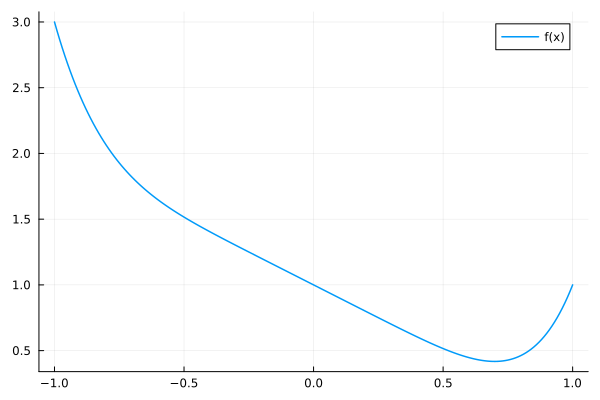

In [8]:
## Steepest descent linear convergence
# The steepest descent method converges linearly. Let's see what happens
# when we use this to minimize the function

# we will minimize the funciton

f = x -> x.^6 - x + 1
x = -1:0.01:1
fx = map(f, x)
using Plots
plot(x, fx, lab="f(x)", linewidth=1.5)

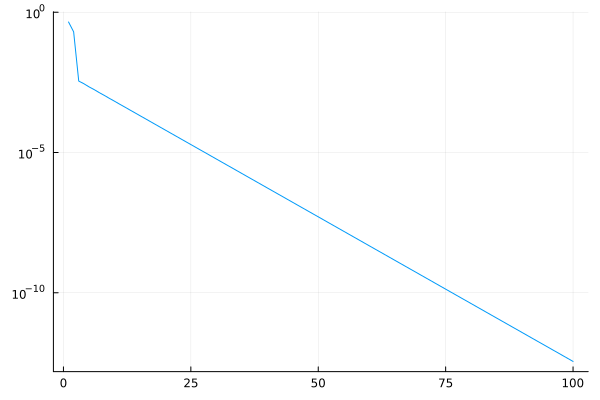

In [9]:
g = x -> 6*x.^5 -1
xtrue = (1/6)^(1/5)

x = 0.0
err = zeros(100)
for i=1:100
    x = x - 0.25*g(x)
    err[i] = abs(x-xtrue)
end
plot(err, yaxis=:log10, lab="")

Note the difference between arithmetic convergence and linear convergence. Arithmetic convergence is _linear_ on a log-log plot. Linear or geometric or exponential convergence is _linear_ on a semilogy plot. Super-linear convergence is _nonlinear_ and _accelerating_ on a semilogy plot (i.e. it goes to zero faster than linear, not slower).